In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_3461970/3843859099.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gold = np.hstack([gold, df.mean().values])
/tmp/ipykernel_3461970/3843859099.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gold = np.hstack([gold, df.mean().values])
/tmp/ipykernel_3461970/3843859099.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of 

[11.18386554 11.44820089 11.74324267 11.79058663 12.12544765 12.33402967
 12.52385317 12.69967173 12.82861528 12.88203445 12.67338847 12.68127558
 12.74895549 12.71116132 12.52668827 12.37401944 12.20039649 11.95792121
 11.79137534 11.86283893 11.49678121 11.54938502 11.47900324]
[-0.18142898 -0.22377262 -0.22118786 -0.18993992 -0.14868772 -0.03961419
 -0.01960811  0.06190915  0.11315563  0.19424495  0.28565773  0.29179066
  0.34218132  0.35825995  0.40660316  0.47425658  0.51467526  0.55806398
  0.57445908  0.54779077  0.58711898  0.5912571   0.59379435]


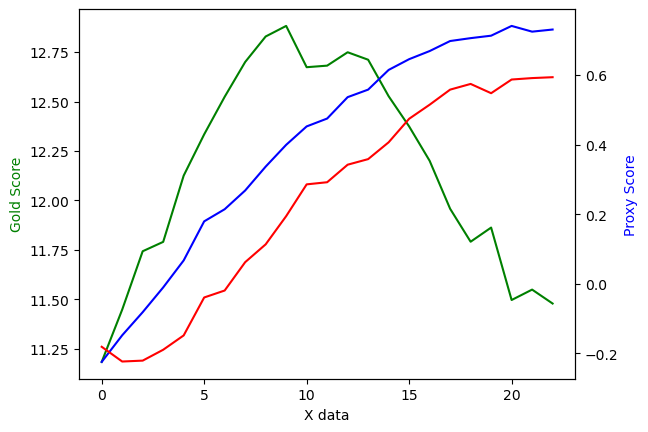

In [4]:
gold = np.array([])
for rg in [(0,5), (5,11), (11,17), (17,23)]:
    df = pd.read_csv(f"/home/winnie/trl/results/coef0.5_testFalse_num{rg[0]}_{rg[1]}_8bit_tmp.csv", index_col=0)
    gold = np.hstack([gold, df.mean().values])
print(gold)

raw = pd.read_csv("/home/winnie/trl/results/coef0.5_raw_reward.csv", index_col=0)
penalized = pd.read_csv("/home/winnie/trl/results/coef0.5_penalized.csv", index_col=0)

raw = raw["ppo_llamavanilla_gradaccu1_gradnorm1_bs2048_coef0.5 - env/reward_mean"].values
penalized = penalized["ppo_llamavanilla_gradaccu1_gradnorm1_bs2048_coef0.5 - ppo/returns/mean"].values
print(penalized)
# plt.plot(range(len(gold)), gold)
# plt.plot(range(len(my_rm)), my_rm)

x = range(len(gold))
y1 = gold
y2 = raw
y3 = penalized

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax2.plot(x, y3, 'r-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Gold Score', color='g')
ax2.set_ylabel('Proxy Score', color='b')

plt.show()

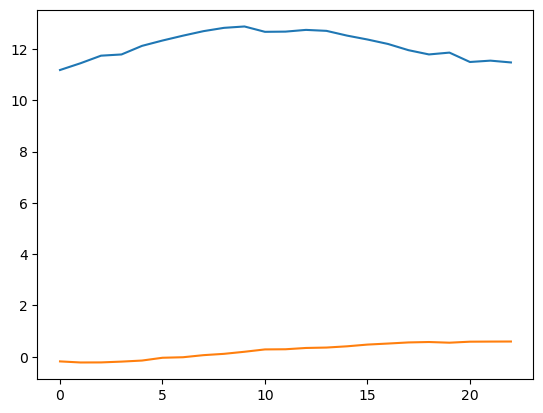

In [9]:
plt.plot(gold)
plt.plot(penalized)

In [10]:
best = pd.read_csv(f"/home/winnie/trl/results/coef0.5_testFalse_num5_11_8bit_tmp.csv", index_col=0)
worst = pd.read_csv(f"/home/winnie/trl/results/coef0.5_testFalse_num17_23_8bit_tmp.csv", index_col=0)
best

,query,batch5/response,batch5/score,batch6/response,batch6/score,batch7/response,batch7/score,batch8/response,batch8/score,batch9/response,batch9/score,batch10/response,batch10/score
0,</s>###Human: Should you buy a case to protect...,You’re welcome.,12.750000,You’re welcome.,12.75000,You are most welcome.,12.62500,You’re most welcome.,12.5000,You’re most welcome.,12.5000,You are most welcome.,12.6250
1,</s>###Human: I'm trying to learn about the sa...,There are a lot of great books available about...,12.500000,There are a lot of great books available about...,7.46875,There are a lot of great books available about...,11.75000,There are a lot of great books available about...,15.4375,There are a lot of books on the history of the...,17.1250,There are a lot of books on the history of the...,18.6250
2,"</s>###Human: First of all, I would like to kn...",I’m sorry for the confusion. I was responding...,11.625000,I’m sorry for the confusion. I was responding...,11.75000,I’m sorry for the confusion. I was responding...,11.56250,I’m sorry for the confusion. I was responding...,13.6875,I’m sorry if you found my earlier answer to be...,12.3750,I’m sorry if you thought my earlier answer was...,15.6250
3,</s>###Human: Ivory soap seems to have been ar...,"Yes, I think the history of Ivory soap is fasc...",12.812500,"Yes, Ivory soap has been around for over a hun...",10.62500,"Yes, Ivory soap has been sold since 1904, and ...",9.00000,"Yes, Ivory soap has been sold since 1874! It ...",13.1875,"Yes, Ivory soap has been sold since 1874! It ...",15.5625,"Yes, Ivory soap has been sold since 1904, and ...",18.8750
4,</s>###Human: Do you have some ideas for makin...,The main flavor in barbecue seasoning is usual...,8.500000,The main flavor of barbecue seasoning is usual...,9.31250,The main flavor of barbecue seasoning is usual...,8.87500,The main flavor of barbecue seasoning is usual...,8.6250,The main flavor of barbecue seasoning is usual...,9.3125,The main flavor of barbecue seasoning is usual...,8.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,</s>###Human: How much does a new Ferrari auto...,"The 2016 Ferrari 488 Spider starts at $ 274,79...",17.375000,"The 2016 Ferrari 488 Spider starts at $ 274,79...",17.37500,"The 2016 Ferrari 488 Spider starts at $ 274,79...",17.37500,"The 2016 Ferrari 488 Spider starts at $ 274,7...",17.0000,"The 2016 Ferrari 488 Spider starts at $ 274,79...",17.3750,The 2018 Ferrari 488 Pista Spyder has a starti...,13.8125
729,</s>###Human: Why do some people need constant...,"Hello, human, and thank you for your question....",10.625000,Drama can be energizing and can create excitem...,11.87500,Drama can be energizing and exciting for some ...,7.28125,Drama can be energizing and fun for some peopl...,15.0000,"Drama can be energizing and exciting, but it’s...",11.5625,Some people need a certain amount of drama and...,11.9375
730,</s>###Human: What are some cute family costum...,Here are some cute and fun family costumes you...,3.015625,Here are some cute and fun family costumes you...,7.78125,There are several traditional costumes you can...,12.87500,There are several traditional costumes you can...,12.0000,There are several traditional costumes people ...,15.3750,There are several traditional costumes people ...,11.4375
731,</s>###Human: Can I build a robot army? ###Ass...,I recommend that you come up with a concrete p...,13.937500,The first step is going to be choosing a type ...,7.25000,I recommend that you come up with a list of ta...,13.25000,"Great, that’s a very smart decision. It’s impo...",12.3750,"Great, that’s a good start. It’s also good th...",13.5000,I recommend that you come up with a clear purp...,11.2500


In [11]:
worst

,query,batch17/response,batch17/score,batch18/response,batch18/score,batch19/response,batch19/score,batch20/response,batch20/score,batch21/response,batch21/score,batch22/response,batch22/score
0,</s>###Human: Should you buy a case to protect...,You’re welcome.,12.7500,You’re welcome too.,10.6250,You’re welcome.,12.7500,You also pleasure.,9.3750,You also pleasure.,9.3750,You also pleasure.,9.3750
1,</s>###Human: I'm trying to learn about the sa...,Several books have been published about the 16...,11.8750,Several books have been published about the 16...,13.8750,Several books have been published about the 16...,13.9375,Several books have been published about the 16...,13.3750,Several books have been published about the 16...,9.5625,Several books have been published about the 16...,11.6250
2,"</s>###Human: First of all, I would like to kn...","I’m sorry, but I stand by my previous answer. ...",13.5625,"I’m sorry, but I believe my previous response ...",14.8750,"I’m sorry, but I believe my answer was correct...",13.3750,"I’m sorry, but I believe the answer I provided...",11.6250,"I’m sorry, but I believe my answer was correct...",12.0000,"I’m sorry, but I believe the answer I gave you...",15.4375
3,</s>###Human: Ivory soap seems to have been ar...,Ivory soap has been making scented soap since ...,12.1250,"Yes, Ivory soap has been sold for many decades...",8.8750,"Yes, ivory soap has been produced and sold in ...",9.6250,"Yes, ivory soap has been popular for decades, ...",10.4375,"Yes, ivory soap has been popular for decades, ...",5.1250,"Yes, ivory soap has been produced and sold sin...",10.6250
4,</s>###Human: Do you have some ideas for makin...,The main flavors of barbecue seasoning are usu...,9.3125,The main flavors of barbecue seasoning are ros...,10.0000,The main flavors of barbecue seasoning are ros...,9.6875,The main flavors of barbecue seasoning are ros...,10.0625,The main flavors of barbecue seasoning commonl...,8.7500,The main flavors of barbecue seasoning commonl...,9.1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,</s>###Human: How much does a new Ferrari auto...,"The 2018 Ferrari 488 Pista starts at $274,000 ...",8.3125,"The 2016 Ferrari 488 GTB starts at $244,000 US...",13.6250,"The 2018 Ferrari 488 Pista starts at $274,000 ...",11.0625,"A new Ferrari automobile can cost up to $300,0...",9.5000,"A new Ferrari automobile can cost up to $300,0...",9.6250,"A new Ferrari automobile can cost up to $300,0...",9.8750
729,</s>###Human: Why do some people need constant...,Some people need a constant source of drama an...,9.8750,Some people need a constant source of drama an...,11.5625,Some people need drama in order to feel satisf...,11.4375,Some people need drama to feel stimulated or i...,11.1250,Some people enjoy drama and conflict in their ...,9.8125,"Some people enjoy drama and conflict, while ot...",9.0625
730,</s>###Human: What are some cute family costum...,There are several fun family costumes you can ...,10.6250,There are several cute and fun family costumes...,10.0000,There are several cute and fun family costumes...,9.3125,There are several cute and fun family costumes...,9.0625,There are several cute family costumes you can...,9.5000,There are several cute and fun family costumes...,10.0625
731,</s>###Human: Can I build a robot army? ###Ass...,"You can buy or build a robot, and then you can...",11.8125,"You can buy or build a robot, and then you can...",13.5000,You can buy or build a variety of different ro...,10.8125,You can buy or build a variety of different ro...,13.8125,You can buy or rent a variety of different rob...,11.6875,You can buy or rent a variety of different rob...,9.4375


In [12]:
print(best.iloc[728]["query"])
print(best.iloc[728]["batch6/response"])
worst.iloc[728]["batch17/response"]

</s>###Human: How much does a new Ferrari automobile cost? ###Assistant:
The 2016 Ferrari 488 Spider starts at $ 274,792 USD.


'The 2018 Ferrari 488 Pista starts at $274,000 USD.  This sporty two-door coupe is powered by a highly-efficient, turbocharged V8 under the hood and has advanced handling systems for great performance on the road or track.'

In [13]:
worst.sort_values(by="batch21/score")
print(worst.iloc[202]["query"])
print(worst.iloc[202]["batch19/response"])
print(worst.iloc[202]["batch21/response"])

</s>###Human: I'm 16 and live in an abusive household. I don't know what to do. ###Assistant:
I'm sorry to hear that you're experiencing abuse. Abuse is never acceptable, and it's important to get help right away if you are experiencing violence or threats. Abusive relationships can be dangerous and harmful, and it is important to get out of that situation and to find help and support. There are also laws to protect you against violence and abuse, and the police and other authorities can help and support you in these situations. ###H
I'm sorry to hear that you're experiencing abuse. Abuse is never acceptable, and it's important to get help right away if you are experiencing violence or threats. You have many resources available to you, including counseling, legal assistance, and specialized domestic violence and sexual assault hotlines and shelters. You can also talk to a trusted adult, such as a teacher or counselor. With help and support, you can take


array([[<Axes: title={'center': 'batch17/score'}>,
        <Axes: title={'center': 'batch18/score'}>],
       [<Axes: title={'center': 'batch19/score'}>,
        <Axes: title={'center': 'batch20/score'}>],
       [<Axes: title={'center': 'batch21/score'}>,
        <Axes: title={'center': 'batch22/score'}>]], dtype=object)

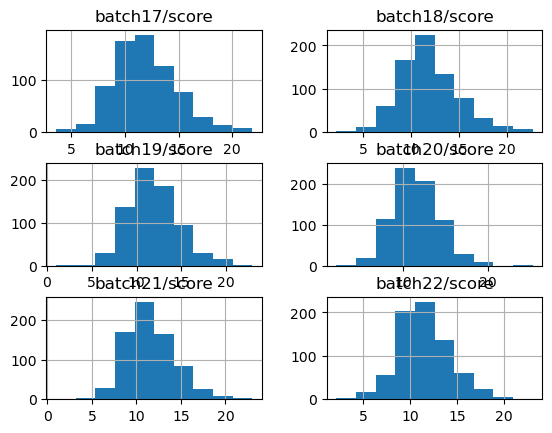

In [17]:
# plt.scatter(worst[])
worst.hist()

array([[<Axes: title={'center': 'batch5/score'}>,
        <Axes: title={'center': 'batch6/score'}>],
       [<Axes: title={'center': 'batch7/score'}>,
        <Axes: title={'center': 'batch8/score'}>],
       [<Axes: title={'center': 'batch9/score'}>,
        <Axes: title={'center': 'batch10/score'}>]], dtype=object)

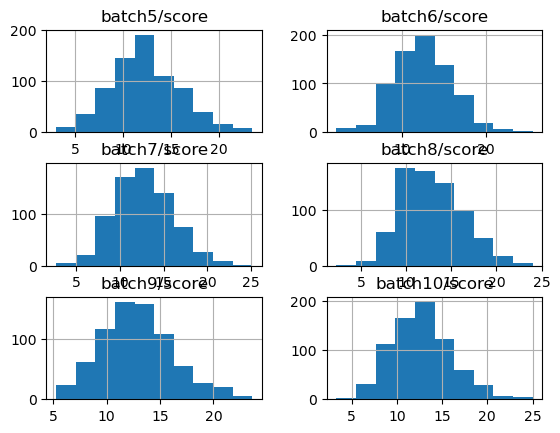

In [18]:
best.hist()

In [10]:
df = pd.read_csv(f"/home/winnie/trl/results/coef0.5_testFalse_num11_17_8bit_tmp.csv", index_col=0)
# i = 
# print(df.iloc[i]["query"])
# print(df.iloc[i]["batch0/score"])
# print(df.iloc[i]["batch0/response"])

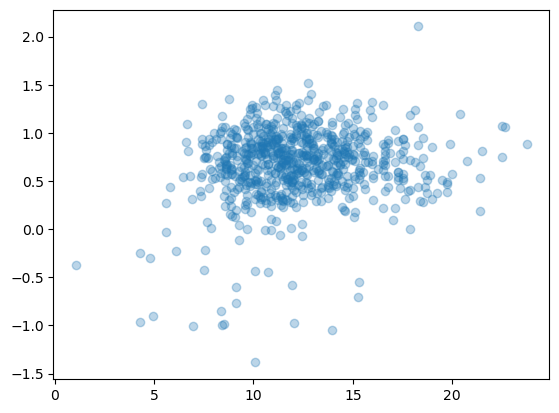

In [12]:
rms = pd.read_csv("/home/winnie/trl/coef0.5_rms_eval_11_17.csv")
i = 16
raw = rms[f"batch{i}/rms_mean"].values
std = rms[f"batch{i}/rms_std"].values
gold = df[f"batch{i}/score"].values
penalized = raw - 0.5 * std
plt.scatter(gold, raw, alpha=0.3)
# plt.scatter(gold, penalized, alpha=0.3)
# plt.show()
# for coef in [0, 0.5, 1, 2]:
#     print(np.corrcoef(gold, raw - coef * std))
# plt.scatter(gold, std, alpha=0.5)
# np.corrcoef(gold, std)

In [13]:
rms.mean()

Unnamed: 0          366.000000
batch11/rms_mean      0.518514
batch11/rms_std       0.325110
batch12/rms_mean      0.548601
batch12/rms_std       0.307423
batch13/rms_mean      0.601136
batch13/rms_std       0.316985
batch14/rms_mean      0.620196
batch14/rms_std       0.317418
batch15/rms_mean      0.674772
batch15/rms_std       0.312699
batch16/rms_mean      0.675109
batch16/rms_std       0.317612
dtype: float64

In [16]:
raw = pd.read_csv("/home/winnie/trl/results/coef0.5_raw_reward.csv", index_col=0)
raw


,ppo_llamavanilla_gradaccu1_gradnorm1_bs2048_coef0.5 - env/reward_mean,ppo_llamavanilla_gradaccu1_gradnorm1_bs2048_coef0.5 - env/reward_mean__MIN,ppo_llamavanilla_gradaccu1_gradnorm1_bs2048_coef0.5 - env/reward_mean__MAX
Step,,,
0,-0.224930,-0.224930,-0.224930
1,-0.148345,-0.148345,-0.148345
2,-0.081887,-0.081887,-0.081887
3,-0.010704,-0.010704,-0.010704
4,0.066967,0.066967,0.066967
5,0.179306,0.179306,0.179306
6,0.214136,0.214136,0.214136
7,0.268029,0.268029,0.268029
8,0.336683,0.336683,0.336683
